# <span style="color: blue;">Part 2.2.1: Curation of model - Catabolism of sugars, false positives KOs </span>

In [1]:
import reframed
import pandas as pd
import warnings

In [2]:
model = reframed.load_cbmodel('model_c_H10_part2_1_1.xml')

## <span style="color: blue;">A: False positive knockouts </span>

**Hexokinase (Ccel_3221/G_WP_015926569_1):** 

- **False positive glucose**

- **False positive on cellobiose**

- **False positive on mannose**
    

#### Getting gene-protein-map from UniProt

In [3]:
%store -r gene_protein_map

In [4]:
gene_protein_map.head(3)

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
0,B8I4G1,LEUD_RUMCH,3-isopropylmalate dehydratase small subunit (E...,leuD Ccel_0127,G_WP_012634581_1
1,B8I8F2,UVRC_RUMCH,UvrABC system protein C (Protein UvrC) (Excinu...,uvrC Ccel_0807,G_WP_015924347_1
2,B8I567,UPP_RUMCH,Uracil phosphoribosyltransferase (EC 2.4.2.9) ...,upp Ccel_0260,G_WP_012634712_1


### <span style="color: blue;">A.1: False positive on glucose and cellobiose - Hexokinase (Ccel_3221/G_WP_015926569_1) mutant</span>


The hexokinase reaction is carried out by several proteins in the model. Since it is essential for growth on cellobiose, this is likely not the case. 
The true protein: **G_WP_015926569_1**

**The protein catalyzes the following reactions**: 
- **R_HEX1: M_atp_c + M_glc__D_c --> M_adp_c + M_g6p_c + M_h_c: (G_WP_015924247_1 or G_WP_015925130_1 or G_WP_015925627_1 or G_WP_015926569_1 or G_WP_015926770_1)**
- R_HEX4: M_atp_c + M_man_c --> M_adp_c + M_h_c + M_man6p_c: G_WP_015926569_1
- R_HEX7: M_atp_c + M_fru_c --> M_adp_c + M_f6p_c + M_h_c: (G_WP_015924474_1 or G_WP_015926569_1)
GPR for HEX1 should be changed as it is likely only catalyzed by the one protein, since it is essential for growth.


**Model behavior - false positive on glucose and cellobiose**

Model is producing and re-consuming cellobiose. There is a cycle with R_CEPA and R_BGLA. I don't completely understand where the glucose is going. -> Change reaction directionality?
- R_CEPA: M_cellb_c + M_pi_c <-> M_g1p_c + M_glc__D_c
- and R_BGLA: M_cellb_c + M_h2o_c <-> 2.0 M_glc__D_c

**Strategy**
- Find genes associated with HEX1
    - Find annotation and score in UniProt
- Find gene(s) associated with CEPA and BGLA
    - Find annotation and score in UniProt
- Determine if reaction directionality makes sense.

#### <span style="color: purple;">Details on problem</span>

**Genes involved in HEX1 reaction, UniProt annotations, and their connection to other reactions**

[*Ccel_0700 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_0700)

In [5]:
for rxn in model.gene_to_reaction_lookup()['G_WP_015924247_1']:
    print(model.reactions[rxn])

R_GLUKA_1: M_atp_c + M_glc__aD_c --> M_adp_c + M_g6p_A_c + M_h_c
R_HEX1: M_gtp_c + M_glc__D_c --> M_gdp_c + M_g6p_c + M_h_c


In [6]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015924247_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
1438,B8I7S2,B8I7S2_RUMCH,ROK family protein,Ccel_0700,G_WP_015924247_1



[*Ccel_1663 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_1663)

In [7]:
for rxn in model.gene_to_reaction_lookup()['G_WP_015925130_1']:
    print(model.reactions[rxn])

R_HEX1: M_gtp_c + M_glc__D_c --> M_gdp_c + M_g6p_c + M_h_c


In [8]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015925130_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
497,B8I2M1,B8I2M1_RUMCH,ROK family protein,Ccel_1663,G_WP_015925130_1


[*Ccel_2190 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_2190)

In [9]:
for rxn in model.gene_to_reaction_lookup()['G_WP_015925627_1']:
    print(model.reactions[rxn])

R_AMANK: M_acmana_c + M_atp_c --> M_acmanap_c + M_adp_c + M_h_c
R_HEX1: M_gtp_c + M_glc__D_c --> M_gdp_c + M_g6p_c + M_h_c


In [10]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015925627_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
2628,B8I4M8,B8I4M8_RUMCH,ROK family protein,Ccel_2190,G_WP_015925627_1


[*Ccel_3221 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_3221)

In [11]:
for rxn in model.gene_to_reaction_lookup()['G_WP_015926569_1']:
    print(model.reactions[rxn])

R_HEX4: M_atp_c + M_man_c --> M_adp_c + M_h_c + M_man6p_c
R_HEX7: M_atp_c + M_fru_c --> M_adp_c + M_f6p_c + M_h_c
R_HEX1: M_gtp_c + M_glc__D_c --> M_gdp_c + M_g6p_c + M_h_c


In [12]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015926569_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
1083,B8I0V5,B8I0V5_RUMCH,Hexokinase,Ccel_3221,G_WP_015926569_1


[*Ccel_3430 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_3430)

In [13]:
for rxn in model.gene_to_reaction_lookup()['G_WP_015926770_1']:
    print(model.reactions[rxn])

R_HEX1: M_gtp_c + M_glc__D_c --> M_gdp_c + M_g6p_c + M_h_c


In [14]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015926770_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
259,B8I1T3,B8I1T3_RUMCH,ROK family protein,Ccel_3430,G_WP_015926770_1


**Genes involved CEPA reaction and UniProt annotation**

In [15]:
model.reactions.R_CEPA.name

'Cellobiose phosphorylase'

In [16]:
model.reactions.R_CEPA.gpr

G_WP_015925554_1

[*Ccel_2109 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_2109)

In [17]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']==str(model.reactions.R_CEPA.gpr)]

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
872,B8I421,B8I421_RUMCH,Glycosyltransferase 36,Ccel_2109,G_WP_015925554_1


**Genes involved in BGLA reaction and UniProt annotation**

In [18]:
model.reactions.R_BGLA.gpr

(G_WP_012634655_1 or G_WP_015925872_1)

[*Ccel_0203 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_0203)

In [19]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_012634655_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
2897,B8I510,B8I510_RUMCH,Glycoside hydrolase family 3 domain protein,Ccel_0203,G_WP_012634655_1


[*Ccel_2454 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_2454)

In [20]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015925872_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
688,B8I618,B8I618_RUMCH,Glycoside hydrolase family 3 domain protein,Ccel_2454,G_WP_015925872_1


#### <span style="color: purple;">A.1: Conclusion</span>

**HEX1 reaction**: The only protein with a definite connection to heksokinase is the gene that they knocked out. The other genes/proteins have a less specific annotation (they belong to a family of proteins that could be either [repressors, uncharacterized open reading frames, or kinases (ROK family)](https://www.ebi.ac.uk/interpro/entry/InterPro/IPR000600/). Due to the ambiguous role of these proteins and the gene knockout experiment, the GPR will be changed to only be associated with Ccel_3221/G_WP_015926569_1.

**BGLA and CEPA reaction**: Both in BiGG and in KEGG, the [CEPA](https://www.kegg.jp/entry/R00952) and [BGLA](https://www.kegg.jp/entry/R00306) reactions seem to be reversible. However, given the context, the reversibility of them should be changed to ensure that the model is not able to produce cellobiose from glucose as this does not correspond with the behavior of *R. cellulolyticum*.

#### <span style="color: purple;">A.1: Solution</span>

**Change GPR for HEX1 to only Ccel_3221/G_WP_015926569_1**

In [21]:
model.reactions.R_HEX1.gpr

(G_WP_015924247_1 or G_WP_015925130_1 or G_WP_015925627_1 or G_WP_015926569_1 or G_WP_015926770_1)

In [22]:
prot = reframed.Protein()
prot.genes=['G_WP_015926569_1']
gpr = reframed.GPRAssociation()
gpr.proteins=[prot]
model.set_gpr_association('R_HEX1', gpr)

In [23]:
model.reactions.R_HEX1.gpr

G_WP_015926569_1

<span style="color: red;"> **Remember**: Remove all genes that are not used anymore from the model </span>

In [24]:
model.update()

In [25]:
model.reactions.R_HEX1.gpr

G_WP_015926569_1

**Change reversibility of CEPA and BGLA**

In [26]:
model.reactions.R_CEPA.reversible=False
model.reactions.R_CEPA.lb=0

In [27]:
model.reactions.R_CEPA

R_CEPA: M_cellb_c + M_pi_c --> M_g1p_c + M_glc__D_c

In [28]:
model.reactions.R_BGLA.reversible=False
model.reactions.R_BGLA.lb=0

In [29]:
model.reactions.R_BGLA

R_BGLA: M_cellb_c + M_h2o_c --> 2.0 M_glc__D_c

In [30]:
model.update()

In [31]:
model.reactions.R_CEPA

R_CEPA: M_cellb_c + M_pi_c --> M_g1p_c + M_glc__D_c

In [32]:
model.reactions.R_BGLA

R_BGLA: M_cellb_c + M_h2o_c --> 2.0 M_glc__D_c

#### <span style="color: purple;">A.1: Test</span>


In [33]:
gene_protein_map[gene_protein_map['Gene names'].str.contains('Ccel_3221')]

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
1083,B8I0V5,B8I0V5_RUMCH,Hexokinase,Ccel_3221,G_WP_015926569_1


In [34]:
media = pd.read_csv('carveMe input/carveMe_medium.tsv',sep='\t')

In [35]:
KO_exp= {'H10_minimal_cellobiose':{'media': list(media[media.medium=='H10_minimal_cellobiose']['compound'])}, 
    'H10_minimal_glucose':{'media':list(media[media.medium=='H10_minimal_glucose']['compound'])}}

In [36]:
for ko_exp in KO_exp.keys():
    
    env = reframed.Environment.from_compounds(KO_exp[ko_exp]['media'])
    
    with warnings.catch_warnings(): # The code will create warnings because some of the compounds in the media are not in the model
        warnings.simplefilter('ignore')
        env.apply(model,exclusive=True,inplace=True)
    sol = reframed.cobra.knockout.gene_knockout(model, 'G_WP_015926569_1', method='pFBA')
    KO_exp[ko_exp]['sol_KO']=sol

<span style="color: red;">Model are still able to grow according to pFBA</span>

In [37]:
{key:KO_exp[key]['sol_KO'].values['Growth'] for key,ko_exp in KO_exp.items()}

{'H10_minimal_cellobiose': 1.0700681362344582,
 'H10_minimal_glucose': 0.5599940468522957}

##### <span style="color: purple;">Knockout of Ccel_3221 - growth on cellobiose - analyzing pathway</span>
Below is an illustration of the pathway. In blue the pathway used in this example is shown. The ID of reactions are shown either in green or in red, where the color code indicates whether the reaction should be there or not be there, respectively. 

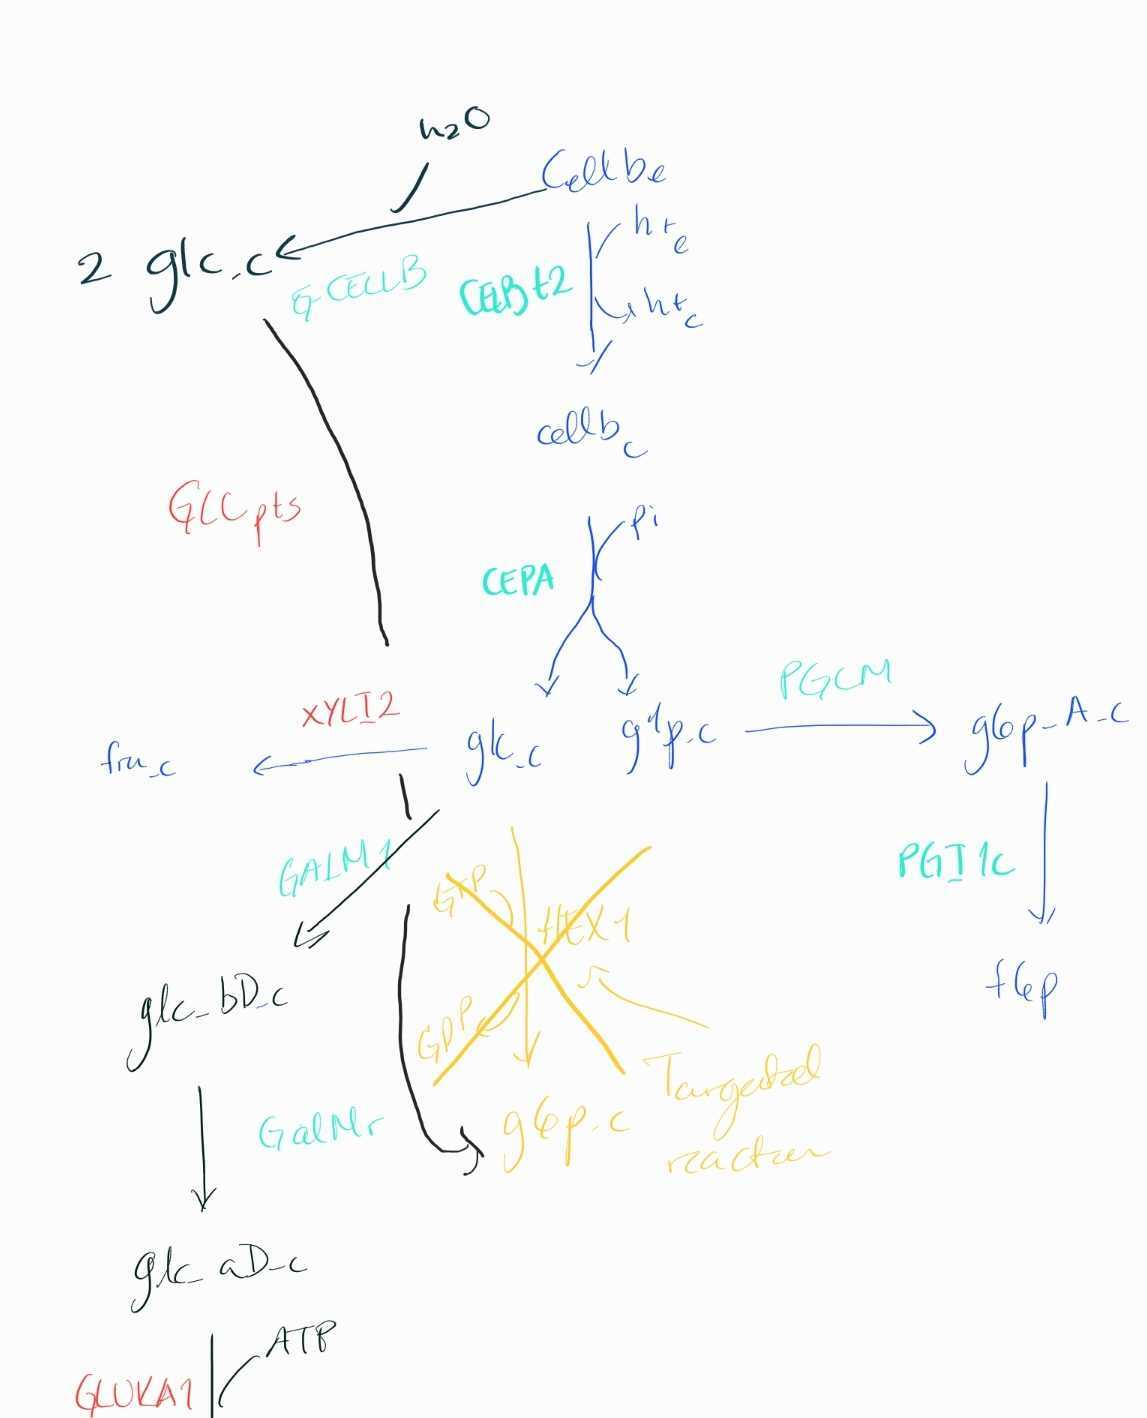

In [38]:
from IPython.display import Image
Image(filename='pathway1.jpg', width=500)

The Ccel_3221 controls the HEX1 reaction which produces glucose-6-phosphate (g6p) from glucose. As we can see below, g6p is not being produced currently. This means that the carbon is taking an alternative pathway. 

In [39]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_g6p_c',model)

[ --> o ] R_PGMT        9.78064  
[ o <-- ] R_PGI         8.84628  
[ o --> ] R_PFK_ppi    -18.6269  


**Transport of cellobiose. The only transporter for cellobiose should be the ABC transporter.**

In [40]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_cellb_e',model)

[ o <-- ] R_EX_cellb_e  10       
[ o --> ] R_CELBt2     -10       


In [41]:
model.reactions.R_CELBt2

R_CELBt2: M_cellb_e + M_h_e --> M_cellb_c + M_h_c

**The cellobiose is being processed by CEPA (an enzyme that likely exists as it is a part of cellulose digestion)**

In [42]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_cellb_c',model)

[ --> o ] R_CELBt2      10       
[ o --> ] R_CEPA       -10       


In [43]:
model.reactions.R_CEPA

R_CEPA: M_cellb_c + M_pi_c --> M_g1p_c + M_glc__D_c

**The glucose is being transformed to fructose by [xylose isomerase (R_XYLI2)](https://www.genome.jp/entry/R00878). Might have a different specificity in R. cellulolyticum.**

In [44]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_glc__D_c',model)

[ --> o ] R_CEPA        10       
[ o --> ] R_XYLI2      -10       


In [45]:
model.reactions.R_XYLI2

R_XYLI2: M_glc__D_c <-> M_fru_c

In [46]:
model.reactions.R_XYLI2.gpr

G_WP_015926769_1

[Ccel_3429 annotation score in UniProt: 2](https://www.uniprot.org/uniprotkb?query=Ccel_3429) But likely is specific to xylose. 

In [47]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015926769_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
2798,B8I1T2,B8I1T2_RUMCH,Xylose isomerase (EC 5.3.1.5),xylA Ccel_3429,G_WP_015926769_1


##### <span style="color: purple;">Knockout of Ccel_3221 and XYLI2- growth on cellobiose - analyzing pathway</span>
Below is an illustration of the pathway. In blue the pathway used in this example is shown. The ID of reactions are shown either in green or in red, where the color code indicates whether the reaction should be there or not be there, respectively. 

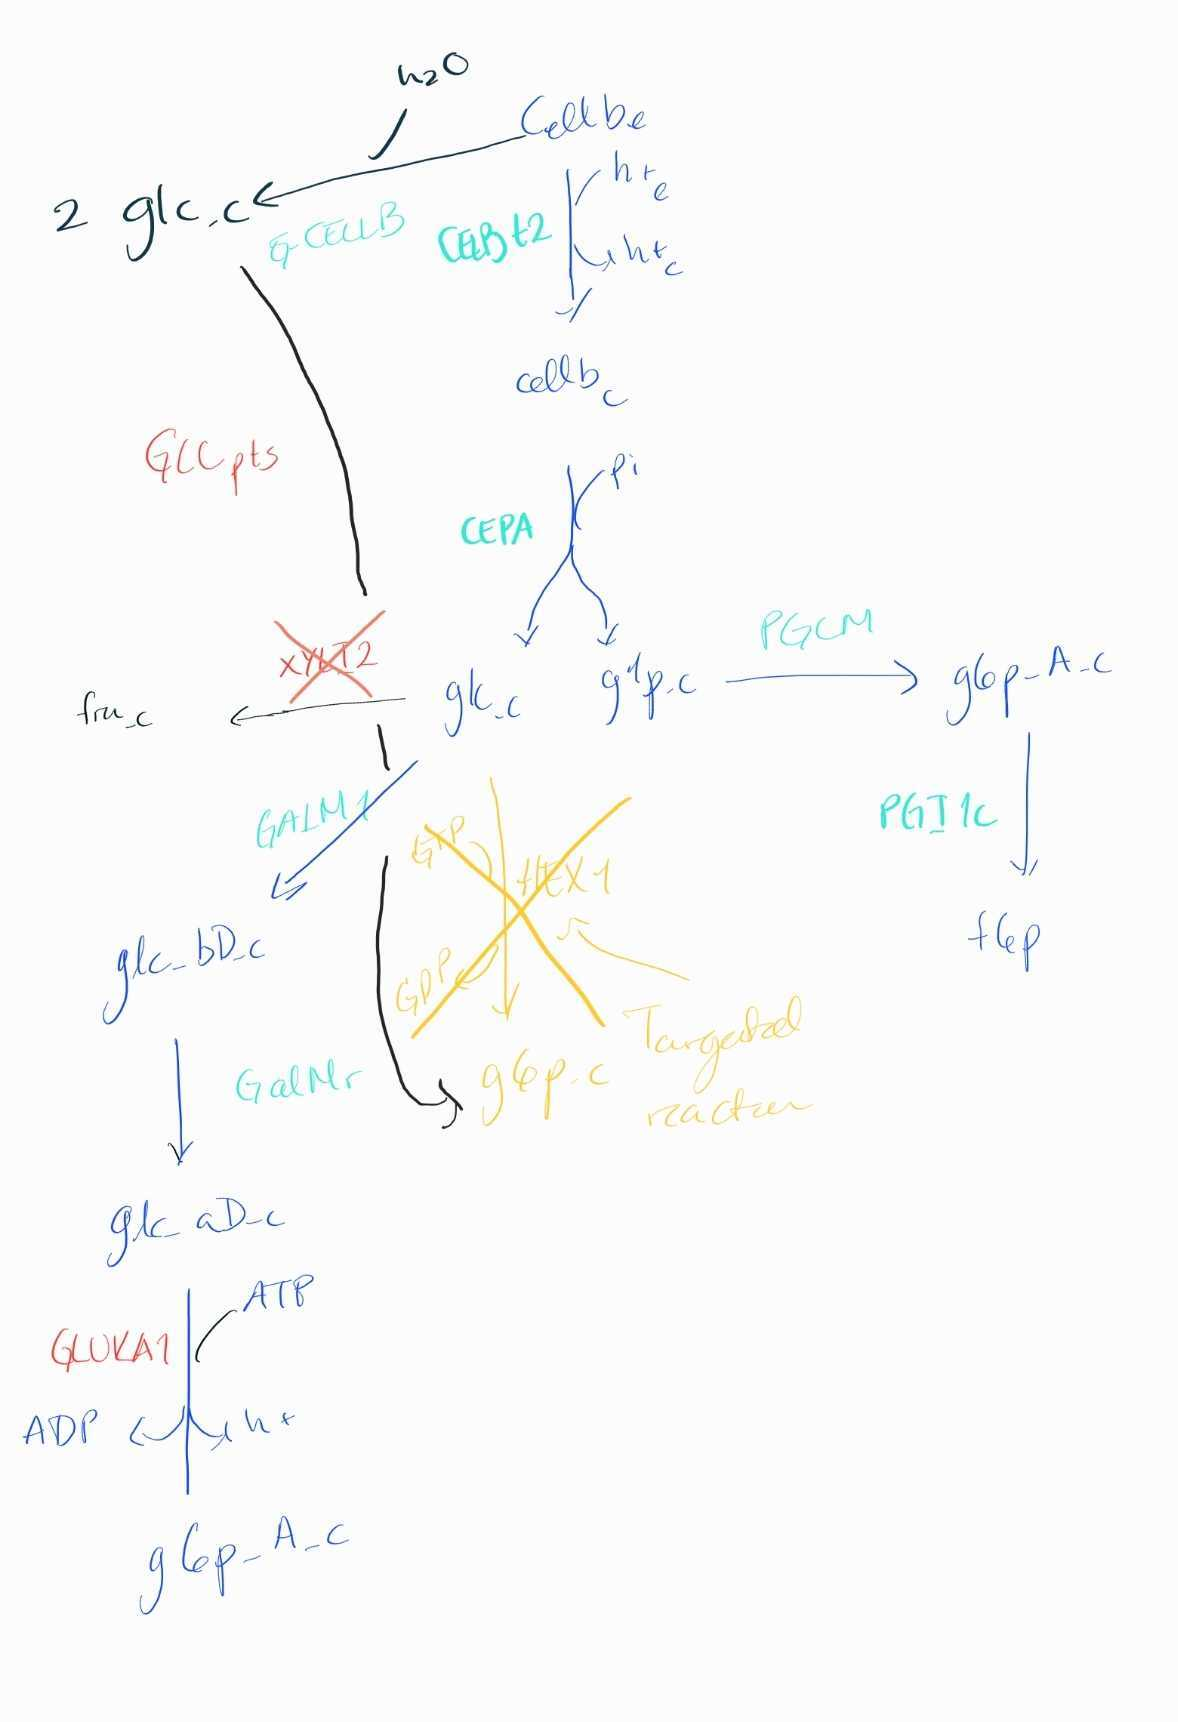

In [48]:
Image(filename='pathway2.jpg', width=500)

In [49]:
KO_exp= {'H10_minimal_cellobiose':{'media': list(media[media.medium=='H10_minimal_cellobiose']['compound'])}, 
    'H10_minimal_glucose':{'media':list(media[media.medium=='H10_minimal_glucose']['compound'])}}

<span style="color: red;">**Blocking any of these reactions does not change the results - too many alternative pathways** </span>

In [50]:
for ko_exp in KO_exp.keys():
    
    env = reframed.Environment.from_compounds(KO_exp[ko_exp]['media'])
    
    with warnings.catch_warnings(): # The code will create warnings because some of the compounds in the media are not in the model
        warnings.simplefilter('ignore')
        env.apply(model,exclusive=True,inplace=True)
    sol = reframed.cobra.knockout.gene_knockout(model, 'G_WP_015926569_1', constraints= {'R_XYLI2':0},method='pFBA')
    KO_exp[ko_exp]['sol_KO']=sol

In [51]:
{key:KO_exp[key]['sol_KO'].values['Growth'] for key,ko_exp in KO_exp.items()}

{'H10_minimal_cellobiose': 1.0700681362344566,
 'H10_minimal_glucose': 0.5599940468522884}

In [52]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_cellb_e',model)

[ o <-- ] R_EX_cellb_e  10       
[ o --> ] R_CELBt2     -10       


**D-Glucose is converted to beta-D-Glucose by Aldose 1-epimerase (glucose) (GALM1)**

In [53]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_glc__D_c',model)

[ --> o ] R_CEPA        10       
[ <-- o ] R_GALM1      -10       


In [54]:
model.reactions.R_GALM1

R_GALM1: M_glc__bD_c <-> M_glc__D_c

In [55]:
model.reactions.R_GALM1.gpr

G_WP_015924930_1

[Ccel_1431 annotation score: 2](https://www.uniprot.org/uniprotkb?query=Ccel_1431). No reason to remove this reaction.

In [56]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015924930_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
2140,B8I1I7,B8I1I7_RUMCH,Aldose 1-epimerase (EC 5.1.3.3),Ccel_1431,G_WP_015924930_1


**beta-D-glucose is converted to alpha-D-glucose by Aldose 1-epimerase (GalMr) - same enzyme as previous**

In [57]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_glc__bD_c',model)

[ o <-- ] R_GALM1       10       
[ <-- o ] R_GalMr      -10       


In [58]:
model.reactions.R_GalMr

R_GalMr: M_glc__aD_c <-> M_glc__bD_c

In [59]:
model.reactions.R_GalMr.gpr

G_WP_015924930_1

**alpha-D-glucose is converted to alpha-g6p by Glucokinase/hexokinase (glc-A) (GLUCA_1)**

In [60]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_glc__aD_c',model)

[ o <-- ] R_GalMr       10       
[ o --> ] R_GLUKA_1    -10       


In [61]:
model.reactions.R_GLUKA_1.name

'Glucokinase/hexokinase (glc-A)'

In [62]:
model.reactions.R_GLUKA_1

R_GLUKA_1: M_atp_c + M_glc__aD_c --> M_adp_c + M_g6p_A_c + M_h_c

In [63]:
model.reactions.R_GLUKA_1.gpr

G_WP_015924247_1

Poor evidence for this enzyme as ROK protein only a family name and not related to a specific function. 

In [64]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015924247_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
1438,B8I7S2,B8I7S2_RUMCH,ROK family protein,Ccel_0700,G_WP_015924247_1


##### <span style="color: purple;">Knockout of Ccel_3221, XYLI2 and GLUKA_1- growth on cellobiose - analyzing pathway</span>
Below is an illustration of the pathway. In blue the pathway used in this example is shown. The ID of reactions are shown either in green or in red, where the color code indicates whether the reaction should be there or not be there, respectively. 

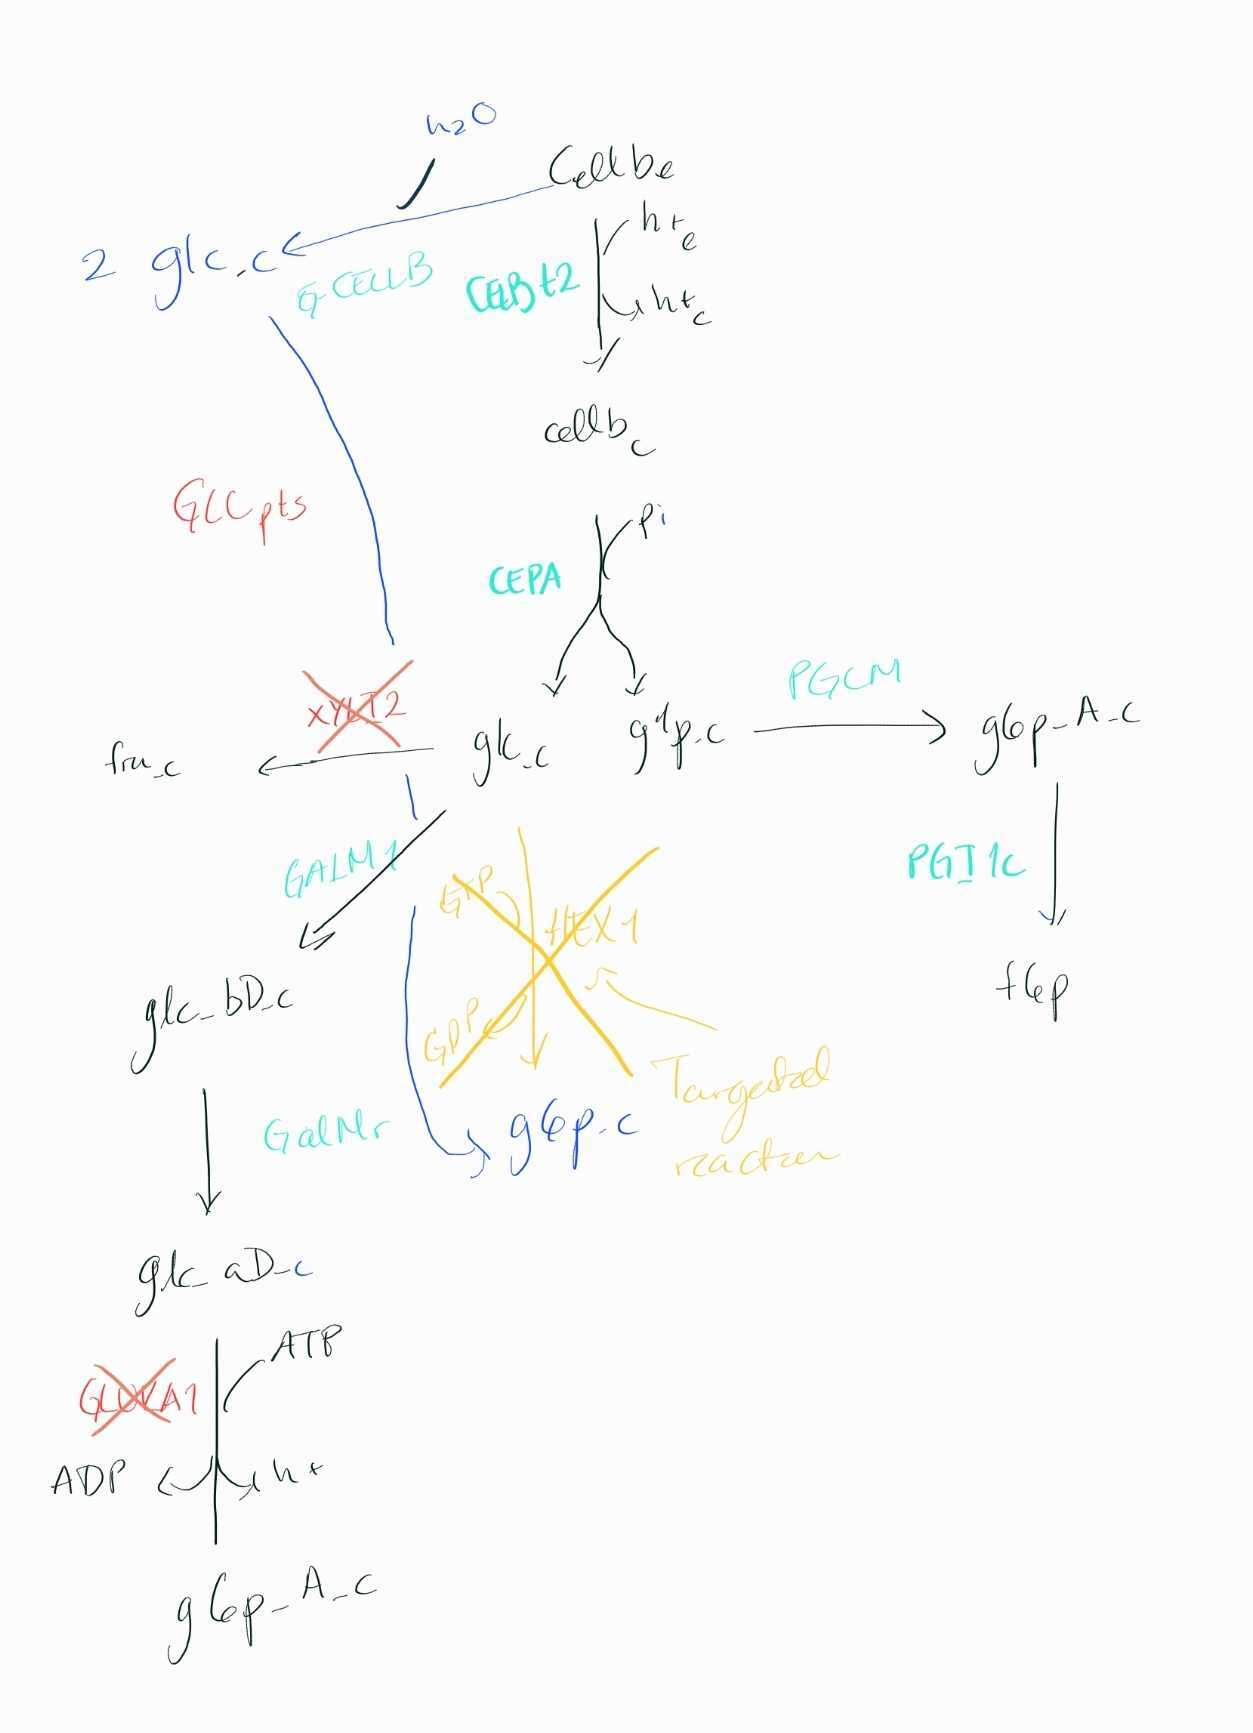

In [65]:
Image(filename='pathway3.jpg', width=500)

In [66]:
KO_exp= {'H10_minimal_cellobiose':{'media': list(media[media.medium=='H10_minimal_cellobiose']['compound'])}, 
    'H10_minimal_glucose':{'media':list(media[media.medium=='H10_minimal_glucose']['compound'])}}

<span style="color: red;">**Blocking any of these reactions does not change the results - too many alternative pathways** </span>

In [67]:
for ko_exp in KO_exp.keys():
    
    env = reframed.Environment.from_compounds(KO_exp[ko_exp]['media'])
    
    with warnings.catch_warnings(): # The code will create warnings because some of the compounds in the media are not in the model
        warnings.simplefilter('ignore')
        env.apply(model,exclusive=True,inplace=True)
    sol = reframed.cobra.knockout.gene_knockout(model, 'G_WP_015926569_1', constraints= {'R_XYLI2':0,'R_GLUKA_1':0},method='pFBA')
    KO_exp[ko_exp]['sol_KO']=sol

In [68]:
{key:KO_exp[key]['sol_KO'].values['Growth'] for key,ko_exp in KO_exp.items()}


{'H10_minimal_cellobiose': 0.9776881532501885,
 'H10_minimal_glucose': 0.5599940468522913}

In [69]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_cellb_e',model)

[ o <-- ] R_EX_cellb_e  10       
[ o --> ] R_BG_CELLB   -10       


In [70]:
model.reactions.R_BG_CELLB

R_BG_CELLB: M_cellb_e + M_h2o_e --> 2.0 M_glc__D_e

In [71]:
model.reactions.R_BG_CELLB.gpr

G_WP_012634822_1

There are no PTS transporters in R. cellulolyticum.

In [72]:
KO_exp['H10_minimal_cellobiose']['sol_KO'].show_metabolite_balance('M_glc__D_e',model)

[ --> o ] R_BG_CELLB    20       
[ o --> ] R_GLCpts     -20       


In [73]:
model.reactions.R_GLCpts

R_GLCpts: M_glc__D_e + M_pep_c --> M_g6p_c + M_pyr_c

In [74]:
model.reactions.R_GLCpts.gpr

G_WP_015924346_1

In [75]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']=='G_WP_015924346_1']

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
2263,B8I8F1,B8I8F1_RUMCH,"Phosphocarrier, HPr family",Ccel_0806,G_WP_015924346_1


##### <span style="color: purple;">Knockout of Ccel_3221, XYLI2, GLUKA_1 and GLCpts - growth on cellobiose - analyzing pathway</span>

In [76]:
KO_exp= {'H10_minimal_cellobiose':{'media': list(media[media.medium=='H10_minimal_cellobiose']['compound'])}, 
    'H10_minimal_glucose':{'media':list(media[media.medium=='H10_minimal_glucose']['compound'])}}

<span style="color: green;">**Blocking this reaction finally changes the results** </span>

In [77]:
for ko_exp in KO_exp.keys():
    
    env = reframed.Environment.from_compounds(KO_exp[ko_exp]['media'])
    
    with warnings.catch_warnings(): # The code will create warnings because some of the compounds in the media are not in the model
        warnings.simplefilter('ignore')
        env.apply(model,exclusive=True,inplace=True)
    sol = reframed.cobra.knockout.gene_knockout(model, 'G_WP_015926569_1', constraints= {'R_XYLI2':0,'R_GLUKA_1':0,'R_GLCpts':0},method='pFBA')
    KO_exp[ko_exp]['sol_KO']=sol

In [78]:
{key:KO_exp[key]['sol_KO'].values['Growth'] for key,ko_exp in KO_exp.items()}


{'H10_minimal_cellobiose': 0.038413367421632996,
 'H10_minimal_glucose': 0.038413367421632996}

### <span style="color: purple;">A.2 Additional curation: false positives on glucose and cellobiose - Hexokinase (Ccel_3221/G_WP_015926569_1) mutant</span>

Based on the past analysis we should remove these reactions:

- R_XYLI2 - a promiscious enzyme which likely has different substrate affinity.
- R_GLUKA_1 - a hexokinase related to a protein with an undefined function.
- R_GLCpts - no PTS transporters exist in R. cellulolyticum.

#### <span style="color: purple;">A.2 analysis

**R_XYLI2**

In [79]:
model.reactions.R_XYLI2.gpr

G_WP_015926769_1

In [80]:
for rxn in model.get_reactions_by_gene('G_WP_015926769_1'):
    print(model.reactions[rxn])

R_XYLI1: M_xyl__D_c <-> M_xylu__D_c
R_XYLI2: M_glc__D_c <-> M_fru_c


**R_GLUKA_1**

In [81]:
model.reactions.R_GLUKA_1.gpr

G_WP_015924247_1

In [82]:

for rxn in model.get_reactions_by_gene('G_WP_015924247_1'):
    print(model.reactions[rxn])

R_GLUKA_1: M_atp_c + M_glc__aD_c --> M_adp_c + M_g6p_A_c + M_h_c


*BlastP to other known enzymes*

The reaction for GLUKA_1: EC 2.7.1.1 (Hexokinase)


The process for determining protein similarity was as following:
1. Find proteins for [EC 2.7.1.1 in UniProt](https://www.uniprot.org/uniprotkb?query=(taxonomy_id:2)%20AND%20(ec:2.7.1.1)). 
2. Download fasta for proteins with annotation score >=2.
3. Do blastp for protein WP_015924247.1 in NCBI (with default settings) against both fasta files. 

***Result:*** Found no significant matches

**R_GLCpts**

In [83]:
model.reactions.R_GLCpts.gpr

G_WP_015924346_1

In [84]:
for rxn in model.get_reactions_by_gene('G_WP_015924346_1'):
    print(model.reactions[rxn])

R_ACGApts: M_acgam_e + M_pep_c --> M_acgam6p_c + M_pyr_c
R_ACMANApts: M_acmana_e + M_pep_c --> M_acmanap_c + M_pyr_c
R_ARBTpts: M_arbt_e + M_pep_c --> M_arbt6p_c + M_pyr_c
R_ASCBpts: M_ascb__L_e + M_pep_c --> M_ascb6p_c + M_pyr_c
R_DHAPT: M_dha_c + M_pep_c --> M_dhap_c + M_pyr_c
R_FRUpts: M_fru_e + M_pep_c --> M_f1p_c + M_pyr_c
R_GALTpts: M_galt_e + M_pep_c --> M_galt1p_c + M_pyr_c
R_GALpts: M_gal_e + M_pep_c <-> M_dgal6p_c + M_pyr_c
R_GAMpts: M_gam_e + M_pep_c --> M_gam6p_c + M_pyr_c
R_GLCpts: M_glc__D_e + M_pep_c --> M_g6p_c + M_pyr_c
R_MALTpts: M_malt_e + M_pep_c --> M_malt6p_c + M_pyr_c
R_MANpts: M_man_e + M_pep_c --> M_man6p_c + M_pyr_c
R_MNLpts: M_mnl_e + M_pep_c --> M_mnl1p_c + M_pyr_c
R_SBTpts: M_pep_c + M_sbt__D_e --> M_pyr_c + M_sbt6p_c
R_SUCpts: M_pep_c + M_sucr_e --> M_pyr_c + M_suc6p_c
R_TREpts: M_pep_c + M_tre_e --> M_pyr_c + M_tre6p_c


#### <span style="color: purple;">A.2 Conclusion

Remove reactions above.

#### <span style="color: purple;">A.2 Solution

In [85]:
model.remove_reactions(['R_XYLI2','R_GLUKA_1','R_GLCpts'])

In [86]:
model.update()

In [87]:
try: 
    model.reactions.R_XYLI2
    
except:
    print('Reactions successfully deleted')

Reactions successfully deleted


In [88]:
try: 
    model.reactions.R_GLUKA_1
    
except:
    print('Reactions successfully deleted')

Reactions successfully deleted


In [89]:
try: 
    model.reactions.R_GLCpts
    
except:
    print('Reactions successfully deleted')


Reactions successfully deleted


### <span style="color: blue;">B.1: False positive on mannose - Hexokinase (Ccel_3221/G_WP_015926569_1) mutant</span>

- Mannose is used to produce mannitol. Check if this reaction should be removed. R_MNLDHr: M_mnl_c + M_nad_c <-> M_h_c + M_man_c + M_nadh_c

Strategy:
- Find gene(s) associated with mannitol production
- Find reactions associated with this gene in model
- Find the components of the enzyme from literature
- Do blastp of protein against known proteins for the enzyme

#### <span style="color: purple;">Details on problem</span>

In [90]:
model.reactions.R_MNLDHr

R_MNLDHr: M_mnl_c + M_nad_c <-> M_h_c + M_man_c + M_nadh_c

In [91]:
model.reactions.R_MNLDHr.gpr

G_WP_015924473_1

In [92]:
gene_protein_map[gene_protein_map['Cross-reference (RefSeq)']==str(model.reactions.R_MNLDHr.gpr)]

,Entry,Entry name,Protein names,Gene names,Cross-reference (RefSeq)
2153,B8I956,B8I956_RUMCH,Alcohol dehydrogenase GroES domain protein,Ccel_0953,G_WP_015924473_1


[*Ccel_0953 annotation score in UniProt: 1*](https://www.uniprot.org/uniprotkb?query=Ccel_0953)

In [93]:
for rxn in model.get_reactions_by_gene('G_WP_015924473_1'):
    print(str(model.reactions[rxn]) + ": " + str(model.reactions[rxn].gpr))

R_MNLDH2: M_mnl_c + M_nad_c --> M_fru_c + M_h_c + M_nadh_c: G_WP_015924473_1
R_MNLDHr: M_mnl_c + M_nad_c <-> M_h_c + M_man_c + M_nadh_c: G_WP_015924473_1
R_SBTD_D2: M_nad_c + M_sbt__D_c --> M_fru_c + M_h_c + M_nadh_c: (G_WP_015924473_1 or G_WP_015924547_1 or G_WP_015925626_1 or G_WP_015926572_1)


**BlastP to other known enzymes**

The reaction for MNDLH2 has EC number: EC:1.1.1.255

The reaction for MNLDHr has EC number: EC:1.1.1.67

The process for determining protein similarity was as following:
1. Find proteins for [EC:1.1.1.255](https://www.uniprot.org/uniprotkb?query=%28ec%3A1.1.1.255%29) and [EC:1.1.1.67](https://www.uniprot.org/uniprotkb?dir=descend&query=(ec:1.1.1.67)&sort=annotation_score) in UniProt. 
2. Download fasta for proteins with annotation score >=2, for both.
3. Do blastp for protein WP_015924473.1 in NCBI (with default settings) against both fasta files. 

**EC:1.1.1.67**: No significant similarity found with BlastP.

**EC:1.1.1.255**: 

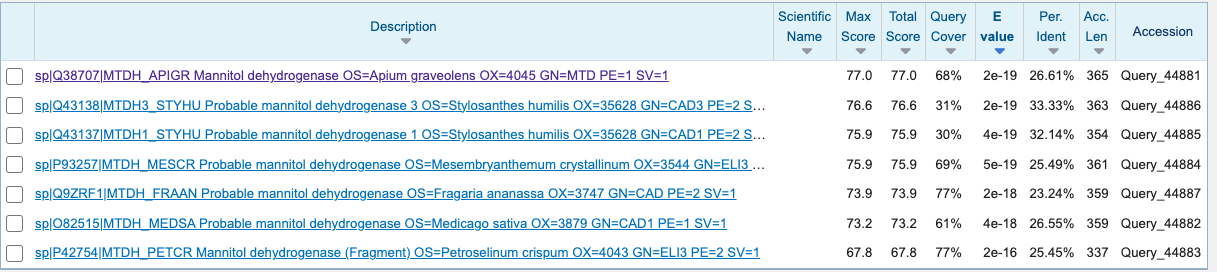

#### <span style="color: purple;">B.1: Conclusion</span>

The MNLDHr reaction should be removed due to the lack of sequence similarity and the results from the KO experiment. As shown above there are only two reactions involving mannitol: MNDLH2 and MNLDHr, so this means that mannitol production will be blocked. Despite this, the results above indicate that there is only sufficient proof for removing MNLDHr, not MNDLH2. 

#### <span style="color: purple;">B.1:Solution</span>

In [94]:
model.remove_reaction('R_MNLDHr')

In [95]:
try: 
    model.reactions.R_MNLDHr
except:
    print('Reactions successfully deleted')

Reactions successfully deleted


In [96]:
model.update()

In [97]:
try: 
    model.reactions.R_MNLDHr
except:
    print('Reactions successfully deleted')

Reactions successfully deleted


#### <span style="color: purple;">B.1. Test</span>

In [98]:
media_man= list(media[media.medium=='H10_minimal_mannose']['compound'])


In [99]:
env_man = reframed.Environment.from_compounds(media_man)

with warnings.catch_warnings(): # The code will create warnings because some of the compounds in the media are not in the model
    warnings.simplefilter('ignore')
    env_man.apply(model,exclusive=True,inplace=True)
    sol = reframed.cobra.knockout.gene_knockout(model, 'G_WP_015926569_1', method='pFBA')

In [100]:
sol.values['Growth']

0.5599940468522907

In [101]:
sol.show_metabolite_balance('M_man_e',model)

[ o <-- ] R_EX_man_e    10       
[ o --> ] R_MANpts     -10       


**Mannose is being transported with PTS, but this one does not have any genetic evidence**

In [102]:
model.reactions.R_MANpts

R_MANpts: M_man_e + M_pep_c --> M_man6p_c + M_pyr_c

**According to the results below, removing this reaction could give better predictions**

In [103]:
sol = reframed.cobra.knockout.gene_knockout(model, 'G_WP_015926569_1',constraints={'R_MANpts':0}, method='pFBA')

In [104]:
sol.values['Growth']

0.03841336742163294

In [105]:
sol = reframed.pFBA(model,constraints={'R_MANpts':0})

In [106]:
sol.values['Growth']

0.5458706156580303

### <span style="color: blue;">B.1: Additional curation: False positive on mannose - Hexokinase (Ccel_3221/G_WP_015926569_1) mutant</span>

Remove following reaction: R_MANpts

In [107]:
model.remove_reaction('R_MANpts')

In [108]:
model.update()

In [109]:
try: 
    model.reactions.R_MANpts
except:
    print('Reactions successfully deleted')

Reactions successfully deleted


## <span style="color: blue;">Summary </span>

**Remove genes/proteins**

In [110]:
[key for key, value in model.gene_to_reaction_lookup().items() if len(value)==0]

['G_WP_015924247_1', 'G_WP_015925130_1', 'G_WP_015926770_1']

In [111]:
model.remove_genes([key for key, value in model.gene_to_reaction_lookup().items() if len(value)==0])

In [112]:
model.update()

In [113]:
[key for key, value in model.gene_to_reaction_lookup().items() if len(value)==0]

[]

**Finish model**

In [114]:
model.id = "model_c_H10_part2_2_1"

In [115]:
reframed.save_cbmodel(model,filename="model_c_H10_part2_2_1.xml")

In [116]:
model_new = reframed.load_cbmodel('model_c_H10_part2_2_1.xml')

In [117]:
model_prev = reframed.load_cbmodel('model_cellulolyticum_H10.xml')

In [118]:
models_dict={model.id:{} for model in [model_new,model_prev]}
models_rxn_dict={model.id:{} for model in [model_new,model_prev]}
for model in [model,model_prev]:
    models_dict[model.id]['Reactions']=len(model.reactions)
    models_dict[model.id]['Metabolites']=len(model.metabolites)
    models_dict[model.id]['Genes']=len(model.genes)
    
    models_rxn_dict[model.id]['Enzymatic']=len(model.get_reactions_by_type(reframed.ReactionType.ENZYMATIC))
    models_rxn_dict[model.id]['Exchange']=len(model.get_reactions_by_type(reframed.ReactionType.EXCHANGE))
    models_rxn_dict[model.id]['Transport']=len(model.get_reactions_by_type(reframed.ReactionType.TRANSPORT))
    models_rxn_dict[model.id]['Sink']=len(model.get_reactions_by_type(reframed.ReactionType.SINK))
    models_rxn_dict[model.id]['Other']=len(model.get_reactions_by_type(reframed.ReactionType.OTHER))
    

**Overview models**

In [119]:
pd.DataFrame(models_dict)

,model_c_H10_part2_2_1,model_cellulolyticum_H10
Reactions,1806,1811
Metabolites,1250,1250
Genes,731,733


**Overview reactions in models**

In [120]:
pd.DataFrame(models_rxn_dict)

,model_c_H10_part2_2_1,model_cellulolyticum_H10
Enzymatic,878,883
Exchange,210,210
Transport,474,475
Sink,0,0
Other,244,243


**Reactions removed**

In [121]:
set(model_prev.reactions)-set(model_new.reactions)

{'R_CD6P',
 'R_GLCpts',
 'R_GLUKA_1',
 'R_ID6P',
 'R_MANpts',
 'R_MNLDHr',
 'R_PFK',
 'R_XYLI2',
 'R_r0191'}

**Reactions added**

In [122]:
set(model_new.reactions)-set(model_prev.reactions)

{'R_FNRR', 'R_FNRR2', 'R_H2td', 'R_PFK_ppi'}